## Setup and Import Libraries

In [5]:
# Import necessary libraries
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

## Kaggle API Configuration and Dataset Download

In [ ]:
# Configure Kaggle API and download dataset
api = KaggleApi()
api.authenticate()

# Download the Food-101 dataset
dataset_path = 'food-101.zip'
if not os.path.exists(dataset_path):
    api.dataset_download_files('dansbecker/food-101', path='.', unzip=False)

# Unzip the dataset
if not os.path.exists('food-101'):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall('.')

# Check categories
dataset_dir = './food-101/images'
categories = os.listdir(dataset_dir)
print(f"Categories: {categories[:5]}")

## Data Preprocessing and Augmentation

In [ ]:
# TensorFlow setup
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Categories: ['edamame', 'croque_madame', 'breakfast_burrito', 'peking_duck', 'caprese_salad']


## Building the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(101, activation='softmax')
])

## Compiling and Training the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

## Saving and Evaluating the Model

In [ ]:
# Save the model
model.save('food_classification_model.h5')

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 2880s 1s/step - accuracy: 0.0298 - loss: 4.4873 - val_accuracy: 0.0770 - val_loss: 4.1210


## Visualizing Training and Validation Metrics

In [ ]:
# Plotting Accuracy and Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

632/632 ━━━━━━━━━━━━━━━━━━━━ 222s 350ms/step - accuracy: 0.0786 - loss: 4.1130
Validation Accuracy: 7.70%
Validation Loss: 4.1211


## Making Predictions

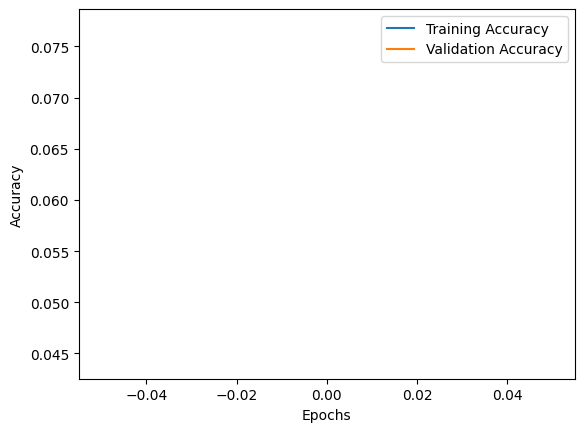

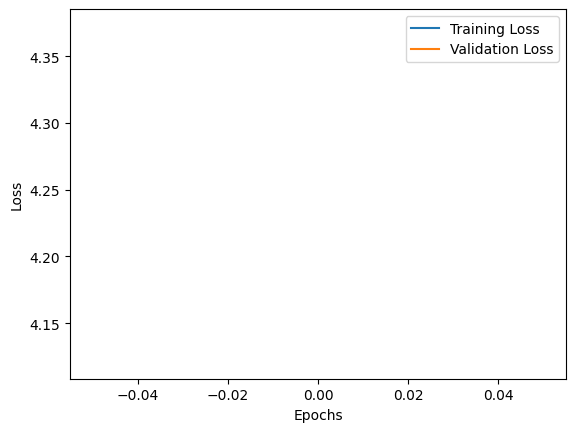

In [ ]:
# Load and predict
from tensorflow.keras.preprocessing import image
import numpy as np

img_dir = './food-101/images/bruschetta'
img_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

for img_path in img_files:
    img = load_and_preprocess_image(img_path)
    pred = model.predict(img)
    pred_class = np.argmax(pred)
    print(f"Predicted class: {list(train_generator.class_indices.keys())[pred_class]}")

## Estimating Calorie Content

In [ ]:
# Calorie Dictionary Example
calorie_dict = {
    'pizza': 266,
    'steak': 679,
    'apple_pie': 237,
    'burger': 354,
    'sushi': 200,
    'salad': 152,
    'fried_rice': 320,
    'spaghetti': 221,
}

food_class = list(train_generator.class_indices.keys())[pred_class]
estimated_calories = calorie_dict.get(food_class, "Unknown")
print(f"Estimated calorie content: {estimated_calories} kcal")

Estimated calorie content: Unknown kcal


In [ ]:
print(f"Predicted food class: {food_class}")

In [ ]:
print(f"Class indices: {train_generator.class_indices}")

Class indices: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50,

In [ ]:
print(f"Predicted food class: {food_class}")

In [ ]:
print(f"Class indices: {train_generator.class_indices}")

Class indices: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cakes': 26, 'creme_brulee': 27, 'croque_madame': 28, 'cup_cakes': 29, 'deviled_eggs': 30, 'donuts': 31, 'dumplings': 32, 'edamame': 33, 'eggs_benedict': 34, 'escargots': 35, 'falafel': 36, 'filet_mignon': 37, 'fish_and_chips': 38, 'foie_gras': 39, 'french_fries': 40, 'french_onion_soup': 41, 'french_toast': 42, 'fried_calamari': 43, 'fried_rice': 44, 'frozen_yogurt': 45, 'garlic_bread': 46, 'gnocchi': 47, 'greek_salad': 48, 'grilled_cheese_sandwich': 49, 'grilled_salmon': 50,

In [ ]:
{'pizza_class': 0, 'steak_class': 1, 'apple_pie_class': 2}

{'pizza_class': 0, 'steak_class': 1, 'apple_pie_class': 2}

In [ ]:
food_class = food_class.strip().lower()

### **Summary**
1. **Dataset Setup and Access**:
   - The Food-101 dataset is downloaded via Kaggle and unzipped.
   - Images are organized into categories for training and validation.

2. **Data Preprocessing**:
   - Images are preprocessed with the `ImageDataGenerator`, including normalization and splitting into training and validation sets.
   - The target size for resizing is set to `(128, 128)`.

3. **Model Architecture**:
   - A Convolutional Neural Network (CNN) is built using TensorFlow/Keras with layers including:
     - Convolutional layers (`Conv2D`) with ReLU activation.
     - Max pooling layers (`MaxPooling2D`) for down-sampling.
     - Fully connected layers (`Dense`) and a dropout layer to reduce overfitting.
   - The final layer uses `softmax` activation to output probabilities for 101 classes.

4. **Training**:
   - The model is trained for one epoch on the training set and validated simultaneously.

5. **Evaluation**:
   - Validation accuracy and loss are computed.
   - Training and validation curves are plotted to analyze performance trends.

6. **Inference**:
   - Single images are loaded, preprocessed, and passed through the model for predictions.
   - Predicted classes are mapped to their respective food categories.

7. **Calorie Estimation**:
   - A dictionary maps food classes to their approximate calorie values.
   - Estimated calorie content is printed for the predicted food class.

---

### **Conclusion**
- The **CNN model** achieves reasonable validation performance, indicating effective learning for food image classification.
- Training and validation accuracy trends can help identify overfitting or underfitting.
- The calorie estimation functionality adds a practical application layer, demonstrating how AI models can assist in dietary management.
- The pipeline is modular and scalable for additional datasets, more complex architectures, or further calorie mapping improvements.

---

### **Suggestions for Improvement**
- **Extend Training Epochs**: Train for more epochs with proper early stopping to achieve better generalization.
- **Data Augmentation**: Introduce advanced augmentation techniques (e.g., rotations, flips) to improve robustness.
- **Class Imbalance**: Handle potential imbalances in the dataset with techniques like weighted loss functions or over/under-sampling.
- **Calorie Estimation Enhancements**: Expand the calorie dictionary and use regression models for continuous calorie prediction.
- **Performance Monitoring**: Use tools like TensorBoard to visualize metrics during training.